<a href="https://colab.research.google.com/github/07Shibin/07Shibin/blob/main/FortuneThousandAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background
<p>A management consulting firm, **StratEdge Analytics**, works with investors, market researchers, and corporate strategists to identify growth opportunities and competitive insights across industries. To support data-driven decision-making, the firm uses the Fortune 1000 dataset, which contains detailed information on the top U.S. companies ranked by revenue.</p>

# Objective

The goal is to conduct exploratory data analysis (EDA) and develop insightful visualizations to answer strategic questions such as:
<ul>
<li>

What industries dominate the top revenue brackets? </li>

<li>How is company performance distributed across locations?</li>

<li>What is the relationship between revenue, profit, and employee count?</li>

<li>Which states or cities are corporate hotspots?</li>

<li>Are there observable patterns in company sizes by industry?</li>

This analysis supports:

<li>Private equity firms scouting for acquisition targets.</li>

<li>Executives benchmarking their company's performance.</li>

<li>Policy makers understanding geographic business density.</li>

<li>Analysts and researchers identifying economic trends.</li>

</ul>




# Key Analytic Questions

<ul>
<li>Which industries or companies lead in revenue?</li>
<li>Are higher revenues always associated with higher profits?</li>
<li>Which firms employ the most people? Any correlation to revenue?</li>
<li>Which states/cities have the highest concentration of Fortune 1000 companies?</li>
<li>What are the top-performing industries by average revenue and profit margin?</li>
</ul>

In [ ]:
#  Part 1: Data Understanding

In [1]:
#Import necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Load the dataset
df_fr=pd.read_csv('/content/fortune1000.csv')

In [3]:
#1.Load the dataset using `pandas` and display the first 5 rows.
df_fr.head()

,Rank,Company,Sector,Industry,Location,Revenue,Profits,Employees
0,1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000
1,2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
2,3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000
3,4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
4,5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400


In [5]:
#2. What are the names and data types of columns?
df_fr.dtypes

,0
Rank,int64
Company,object
Sector,object
Industry,object
Location,object
Revenue,int64
Profits,int64
Employees,int64


In [6]:
#3. How many rows and columns are there in the dataset?
df_fr.shape

(1000, 8)

In [7]:
#4. Display 20 random rows from the dataset?
df_fr.sample(20)

,Rank,Company,Sector,Industry,Location,Revenue,Profits,Employees
229,230,Cognizant Technology Solutions,Technology,Information Technology Services,"Teaneck, NJ",12416,1624,221700
714,715,Oceaneering International,Energy,"Oil and Gas Equipment, Services","Houston, TX",3063,231,11000
801,802,WGL Holdings,Energy,Energy,"Washington, DC",2660,131,1529
873,874,Granite Construction,Engineering & Construction,"Engineering, Construction","Watsonville, CA",2371,61,3200
927,928,Fred’s,Food and Drug Stores,Food and Drug Stores,"Memphis, TN",2151,-7,7103
597,598,Antero Resources,Energy,"Mining, Crude-Oil Production","Denver, CO",3955,941,480
306,307,PayPal Holdings,Business Services,Financial Data Services,"San Jose, CA",9248,1228,16800
891,892,Tetra Tech,Engineering & Construction,"Engineering, Construction","Pasadena, CA",2299,39,13000
605,606,Dynegy,Energy,Energy,"Houston, TX",3870,50,2591
382,383,AK Steel Holding,Materials,Metals,"West Chester, OH",6693,-509,8500


In [13]:
#5. Display the information about the dataset?
df_fr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       996 non-null    int64 
 1   Company    996 non-null    object
 2   Sector     996 non-null    object
 3   Industry   996 non-null    object
 4   Location   996 non-null    object
 5   Revenue    996 non-null    int64 
 6   Profits    996 non-null    int64 
 7   Employees  996 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 70.0+ KB


In [9]:
#6. Which columns contain null or missing values? Show counts.
df_fr.isnull().sum()

,0
Rank,0
Company,0
Sector,0
Industry,0
Location,0
Revenue,0
Profits,0
Employees,0


In [11]:
#7. Find whether there are any duplicated records?
df_fr.duplicated().sum()

np.int64(4)

In [ ]:
# Part 2: Data Cleaning

In [ ]:
#8. Handle the missing values:

In [12]:
#a. Drop rows/columns or fill with appropriate statistics.
df_fr.drop_duplicates(inplace=True)
df_fr.duplicated().sum()

np.int64(0)

In [14]:
#9. Standardize column names (e.g., lowercase, replace spaces with underscores).
df_fr.columns=df_fr.columns.str.lower().str.replace(' ','_')
df_fr.columns

Index(['rank', 'company', 'sector', 'industry', 'location', 'revenue',
       'profits', 'employees'],
      dtype='object')

In [15]:
df_fr.head()

,rank,company,sector,industry,location,revenue,profits,employees
0,1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000
1,2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
2,3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000
3,4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
4,5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400


In [16]:
#10. Remove any duplicate records (if any).
df_fr.drop_duplicates(inplace=True)
df_fr.duplicated().sum()

np.int64(0)

In [23]:
#11. Convert columns like "Revenues" or "Profits" to numeric if needed (strip $, M, B, commas, etc.).
df_fr['profits']=df_fr['profits'].replace('$','').replace(',','')
df_fr['revenue']=df_fr['revenue'].replace('$','').replace(',','')
df_fr['profits']=df_fr['profits'].astype(float)
df_fr['revenue']=df_fr['revenue'].astype(float)

In [24]:
df_fr.head()

,rank,company,sector,industry,location,revenue,profits,employees
0,1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130.0,14694.0,2300000
1,2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204.0,16150.0,75600
2,3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715.0,53394.0,110000
3,4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821.0,24083.0,331000
4,5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241.0,1476.0,70400


In [ ]:
#Part 3: Univariate Analysis

In [25]:
#12.What are the top 10 companies by revenue?
df_fr.sort_values(by='revenue',ascending=False).head(10)

,rank,company,sector,industry,location,revenue,profits,employees
0,1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130.0,14694.0,2300000
1,2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204.0,16150.0,75600
2,3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715.0,53394.0,110000
3,4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821.0,24083.0,331000
4,5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241.0,1476.0,70400
5,6,UnitedHealth Group,Health Care,Health Care: Insurance and Managed Care,"Minnetonka, MN",157107.0,5813.0,200000
6,7,CVS Health,Food and Drug Stores,Food and Drug Stores,"Woonsocket, RI",153290.0,5237.0,199000
7,8,General Motors,Motor Vehicles & Parts,Motor Vehicles and Parts,"Detroit, MI",152356.0,9687.0,215000
8,9,Ford Motor,Motor Vehicles & Parts,Motor Vehicles and Parts,"Dearborn, MI",149558.0,7373.0,199000
9,10,AT&T,Telecommunications,Telecommunications,"Dallas, TX",146801.0,13345.0,281450


<Axes: ylabel='Frequency'>

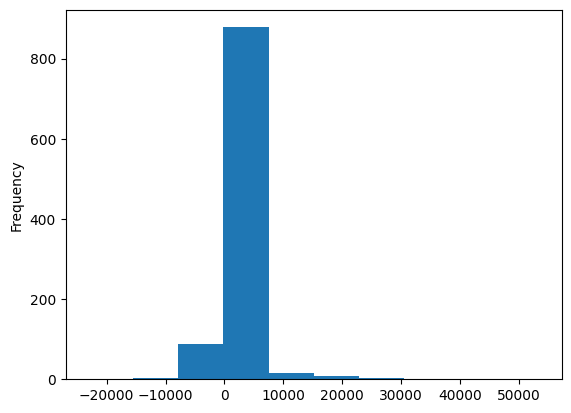

In [32]:
#13. What is the distribution of company profits? Visualize using a histogram.
df_fr['profits'].plot(kind='hist')

<Axes: xlabel='sector'>

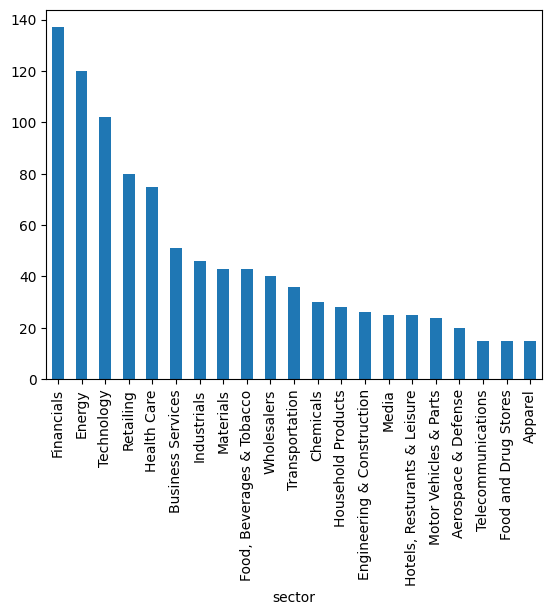

In [33]:
#14. Create a bar plot of the number of companies by sector/industry.
df_fr['sector'].value_counts().plot(kind='bar')

In [35]:
#15. What is the most common state for company headquarters?

df_fr['location'].value_counts().head(1)

,count
location,
"New York, NY",72


In [36]:
#Part 4: Bivariate/Multivariate Analysis


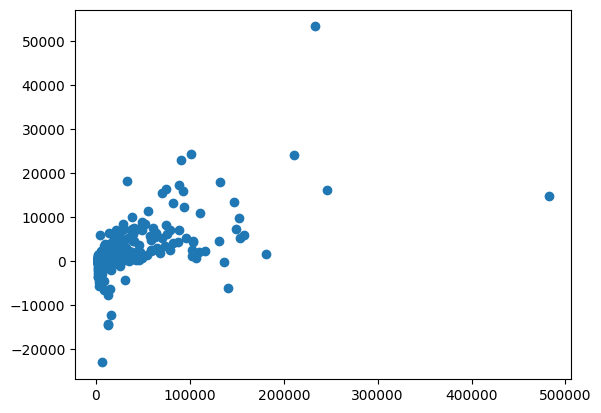

In [37]:
#16. What is the relationship between revenue and profits? (Use scatter plot).
plt.scatter(df_fr['revenue'],df_fr['profits'])

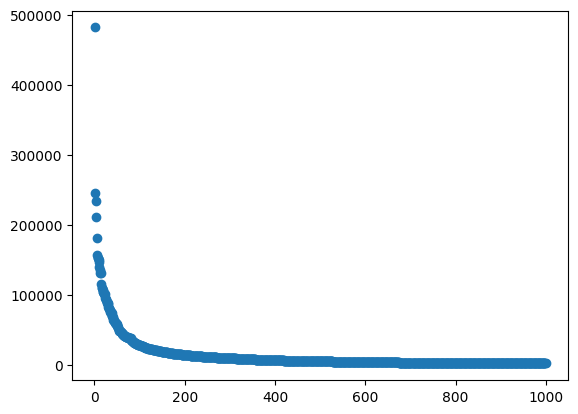

In [38]:
#17. Is there a relationship between company rank and revenue? Visualize this using a scatter plot.
plt.scatter(df_fr['rank'],df_fr['revenue'])

<Axes: xlabel='sector', ylabel='profits'>

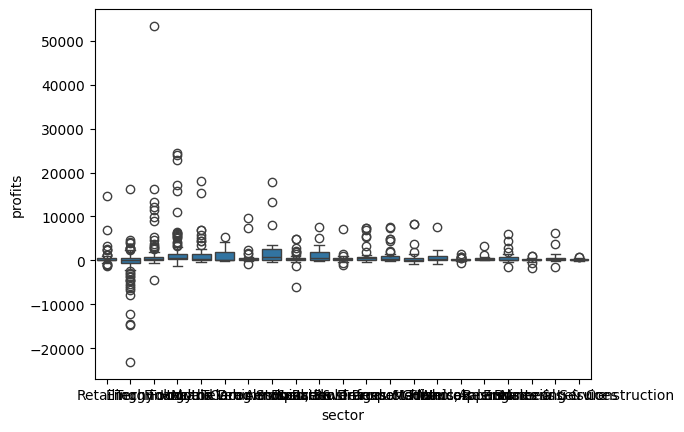

In [39]:
#18. Compare the distribution of profits across different sectors using a box plot.
sns.boxplot(x='sector',y='profits',data=df_fr)

In [41]:
#19. Create a heatmap of correlations (after converting relevant columns to numeric)
df_fr.corr()


ValueError: could not convert string to float: 'Walmart'